# Forecasting Lorenz with DNN

## GPU check

In [21]:
import platform
platform.platform()

'macOS-13.2.1-arm64-arm-64bit'

In [22]:
import tensorflow as tf
tf.__version__

'2.11.0'

In [23]:
gpu = len(tf.config.list_physical_devices("GPU"))>0
gpu

True

In [24]:
tf.config.list_physical_devices("GPU")

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

## Generate data

In [83]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

In [70]:
# Create a function that takes a vector as input and returns (x_dot,y_dot,z_dot) evaluated at t and rho
def lorenz(t, x, rho):
    x = np.array([10*(x[1]-x[0]),
                  x[0]*(rho-x[2])-x[1],
                  x[0]*x[1]-8/3*x[2]])
    return x

In [95]:
# Create a list of evaluation points t_eval
dt = 0.01
tf = 100
num = tf/dt
t_eval = np.linspace(0,tf,int(num)).tolist()

In [96]:
# Create random initial values between 0 and 10
inits = np.random.rand(3)*10
inits = inits.tolist()

In [97]:
sol_rho10 = solve_ivp(lorenz, [0,1000], inits, t_eval=t_eval, args=(10,))
sol_rho28 = solve_ivp(lorenz, [0,1000], inits, t_eval=t_eval, args=(28,))
sol_rho40 = solve_ivp(lorenz, [0,1000], inits, t_eval=t_eval, args=(40,))

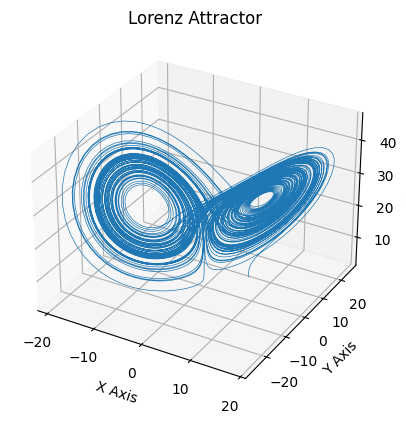

In [98]:
# Plot the data
ax = plt.figure().add_subplot(projection='3d')

ax.plot(*sol_rho28.y, lw=0.5)
ax.set_xlabel("X Axis")
ax.set_ylabel("Y Axis")
ax.set_zlabel("Z Axis")
ax.set_title("Lorenz Attractor")

plt.show()

## Build Keras model